In [110]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

In [111]:
df_no_null = read_csv('hmeq_clean.csv').drop(columns=['Unnamed: 0'])
features = df_no_null.drop(columns=['BAD'])
labels = df_no_null['BAD']

In [113]:
#Data Preprocessing Cell
df = read_csv("hmeq.csv")
df_no_NAN = df.dropna()
df_no_NAN["REASON"] = df_no_null['REASON'].astype('category') 
df_no_NAN.loc[:, ('JOB')] = df_no_null.loc[:, ('JOB')].astype('category').cat.codes

In [114]:
#Method to Train and Evaluate model Performance
def train_and_evaluate_model(model, data): 
    model.fit(data[0], data[2])
    y_pred = model.predict(data[1])
    y_score_1 = model.predict_proba(data[1])[:,1]
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(data[3], y_score_1)
    print("Accuracy: " + str(metrics.accuracy_score(data[3], y_pred)))
    print("Precision Score: " + str(metrics.precision_score(data[3], y_pred)))
    print("Recall Score: " + str(metrics.recall_score(data[3], y_pred)))
    print("F1 score: " + str(metrics.f1_score(data[3], y_pred)))
    print('ROC curve AOC: ', roc_auc_score(data[3], y_score_1))
    cfm = confusion_matrix(data[3], y_pred, normalize = 'true')
    sns.heatmap(cfm, annot = True, cmap = 'Blues')
    plt.subplots(1, figsize=(10,10))
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return [metrics.accuracy_score(data[3], y_pred), 
            metrics.precision_score(data[3], y_pred), 
            metrics.recall_score(data[3], y_pred), 
           metrics.f1_score(data[3], y_pred), 
           roc_auc_score(data[3], y_score_1)]

Accuracy: 0.9333933393339334
Precision Score: 0.6585365853658537
Recall Score: 0.54
F1 score: 0.5934065934065934
ROC curve AOC:  0.7561523244312562


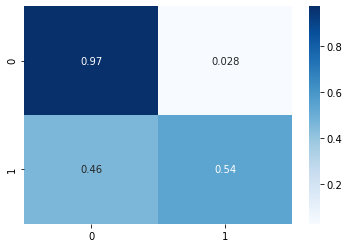

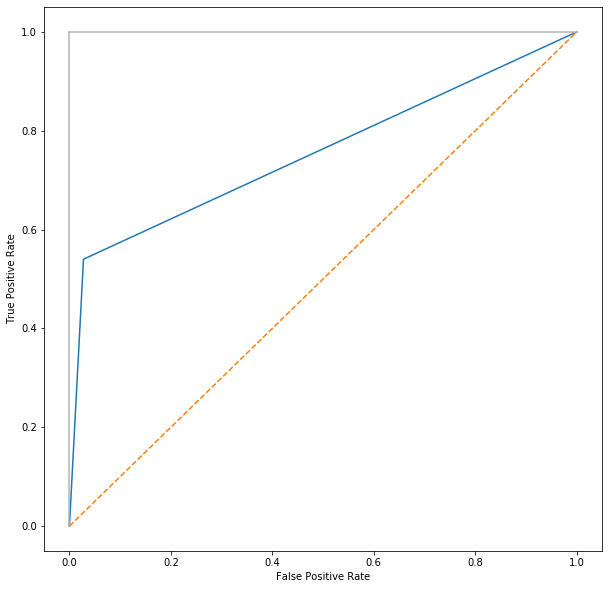

In [115]:
#Decision Tree Cell
features_decision_tree = features.drop(columns = ['REASON', 'CLNO'])
X_train, X_test, y_train, y_test = train_test_split(features_decision_tree, labels, test_size=0.33, random_state=42)
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(features_decision_tree, labels, test_size=0.33, random_state=42)
decision_tree_clf = tree.DecisionTreeClassifier()
scores_dt = train_and_evaluate_model(decision_tree_clf, [X_DT_train, X_DT_test, y_DT_train, y_DT_test])

Accuracy: 0.9522952295229523
Precision Score: 0.9607843137254902
Recall Score: 0.49
F1 score: 0.6490066225165563
ROC curve AOC:  0.9480761622156282


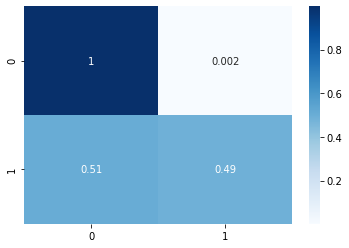

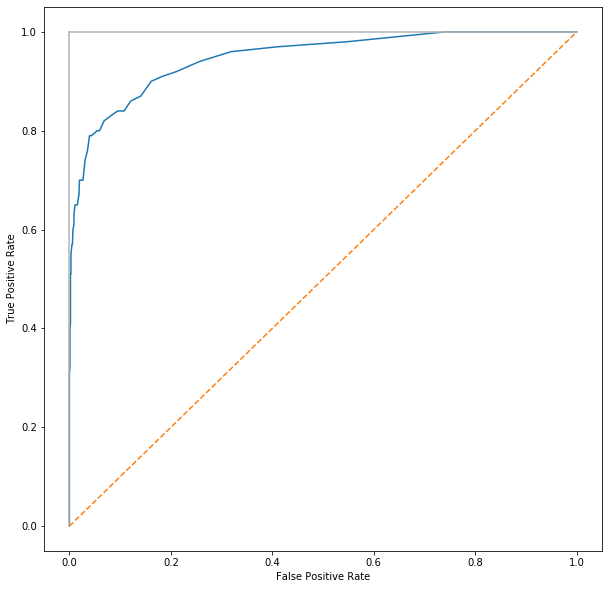

In [86]:
#Random Forest Cell
features_RF = features.drop(columns = ['REASON', 'CLNO'])
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(features_RF, labels, test_size=0.33, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
scores_rf = train_and_evaluate_model(rf_clf, [X_RF_train, X_RF_test, y_RF_train, y_RF_test])

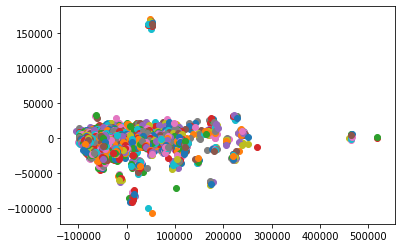

In [116]:
#PCA Misstep
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)
for i in features_pca: 
    plt.scatter(i[0], i[1])
plt.show()

In [117]:
#Correlation Analysis Cell
corr = df_no_null.corr()
corr.style.background_gradient(cmap='coolwarm')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.031215,-0.016552,-0.026215,-0.006247,0.011537,-0.064279,0.253711,0.274893,-0.113906,0.125714,0.007529,0.216959
LOAN,-0.031215,1.000000,0.272924,0.378724,-0.177395,0.093145,0.076359,-0.024263,-0.067468,0.066484,0.051264,0.075893,0.157379
MORTDUE,-0.016552,0.272924,1.000000,0.865265,0.005369,0.144510,-0.103307,-0.042590,-0.035903,0.137741,0.036424,0.320759,0.185446
VALUE,-0.026215,0.378724,0.865265,1.000000,0.038865,0.212449,-0.021113,-0.045910,-0.068415,0.197697,-0.006878,0.215466,0.130928
REASON,-0.006247,-0.177395,0.005369,0.038865,1.000000,0.102729,0.083890,-0.004625,0.023784,0.064282,-0.135883,-0.050213,-0.019048
JOB,0.011537,0.093145,0.144510,0.212449,0.102729,1.000000,-0.057576,-0.009588,-0.032285,0.106027,-0.086254,0.090616,-0.033123
YOJ,-0.064279,0.076359,-0.103307,-0.021113,0.083890,-0.057576,1.000000,-0.055824,0.021976,0.230511,-0.045865,-0.001290,-0.051864
DEROG,0.253711,-0.024263,-0.042590,-0.045910,-0.004625,-0.009588,-0.055824,1.000000,0.147825,-0.053741,0.181596,0.065897,0.035200
DELINQ,0.274893,-0.067468,-0.035903,-0.068415,0.023784,-0.032285,0.021976,0.147825,1.000000,0.011583,0.003523,0.122612,0.038251
CLAGE,-0.113906,0.066484,0.137741,0.197697,0.064282,0.106027,0.230511,-0.053741,0.011583,1.000000,-0.089076,0.201759,-0.050553


Accuracy: 0.9414941494149415
Precision Score: 0.8431372549019608
Recall Score: 0.43
F1 score: 0.5695364238410596
ROC curve AOC:  0.8343323442136499


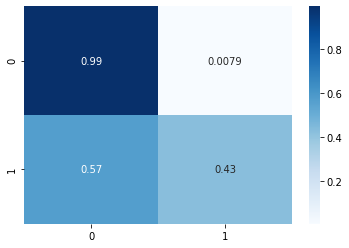

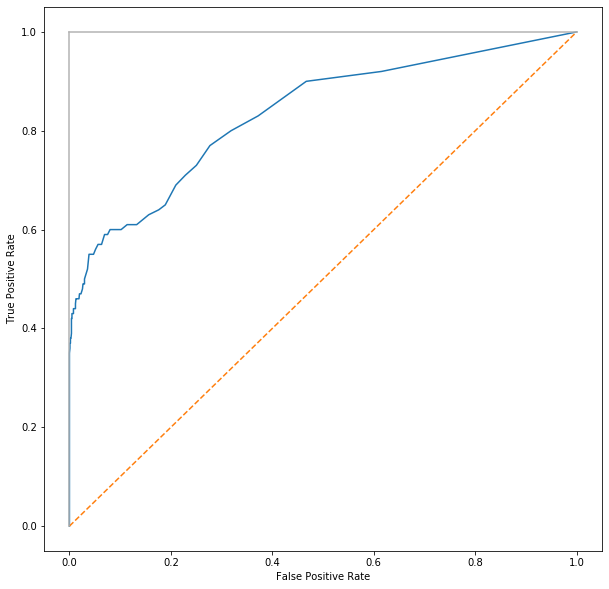

In [118]:
#Model testing with features of a correlation above abs(0.1)
features_1_corr = features.loc[:, ("DEROG", "DELINQ", "CLAGE", "NINQ", "DEBTINC")]
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(features_1_corr, labels, test_size=0.33, random_state=42)
rf_clf_1 = RandomForestClassifier(random_state=42)
scores_rf_01 = train_and_evaluate_model(rf_clf_1, [X_1_train, X_1_test, y_1_train, y_1_test])

Accuracy: 0.9569093610698366
Precision Score: 1.0
Recall Score: 0.48214285714285715
F1 score: 0.6506024096385542
ROC curve AOC:  0.9544020606621902


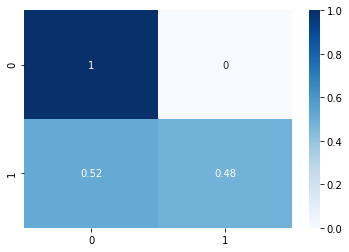

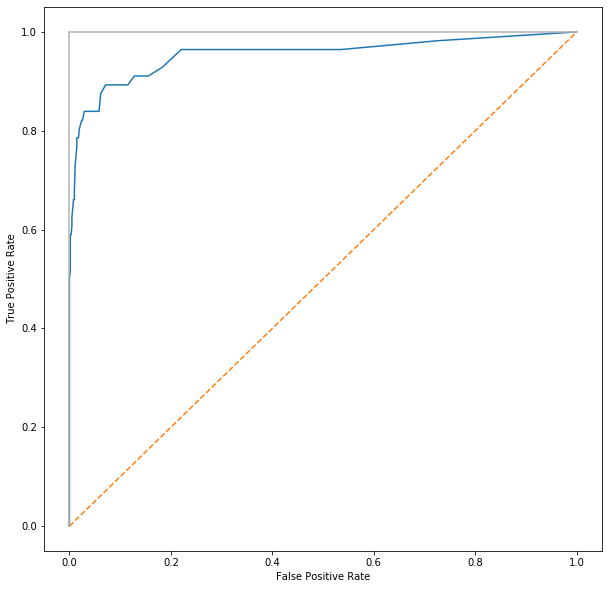

In [119]:
#Model testing with smaller test dataset
X_RF02_train, X_RF02_test, y_RF02_train, y_RF02_test = train_test_split(features_RF, labels, test_size=0.2, random_state=42)
rf_clf_02 = RandomForestClassifier(random_state=42)
scores_rf_test02 = train_and_evaluate_model(rf_clf_02, [X_RF02_train, X_RF02_test, y_RF02_train, y_RF02_test])

In [120]:
#Bar Chart method 
def bar_chart(x_axis, y_axis, title, label_x, label_y): 
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x_axis, y_axis)
    ax.set_title(title)
    ax.set_ylabel(label_y)
    ax.set_xlabel(label_x)
    plt.savefig(label_y+".png")
    plt.show()

In [121]:
#Post Processing 
accuracies = [] 
precisions = [] 
recalls = [] 
f1_scores = [] 
auc_scores = [] 
scores = [scores_dt, scores_rf, scores_rf_01, scores_rf_test02]
for i in scores: 
    accuracies.append(i[0])
    precisions.append(i[1])
    recalls.append(i[2])
    f1_scores.append(i[3])
    auc_scores.append(i[4])

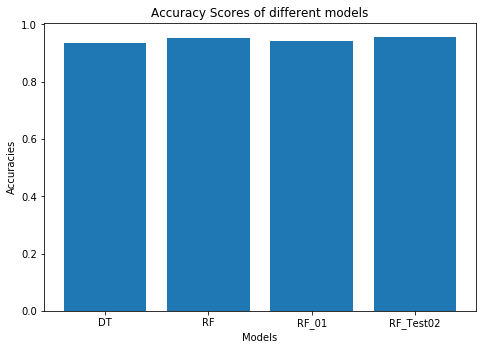

In [122]:
bar_chart(models, accuracies, "Accuracy Scores of different models", "Models", 'Accuracies')

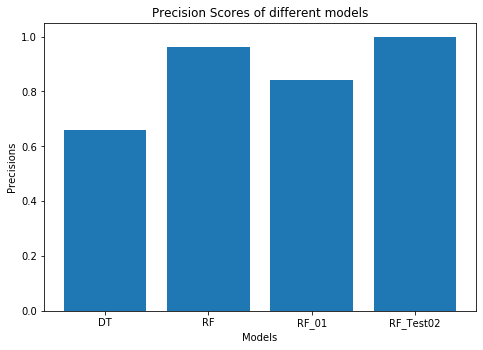

In [123]:
bar_chart(models, precisions, "Precision Scores of different models", "Models", 'Precisions')

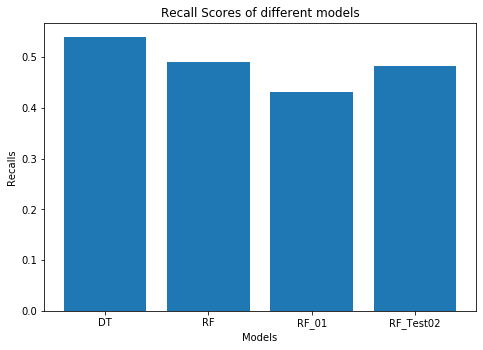

In [124]:
bar_chart(models, recalls, "Recall Scores of different models", "Models", 'Recalls')

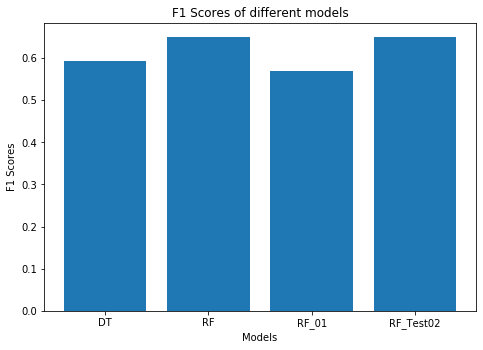

In [125]:
bar_chart(models, f1_scores, "F1 Scores of different models", "Models", 'F1 Scores')

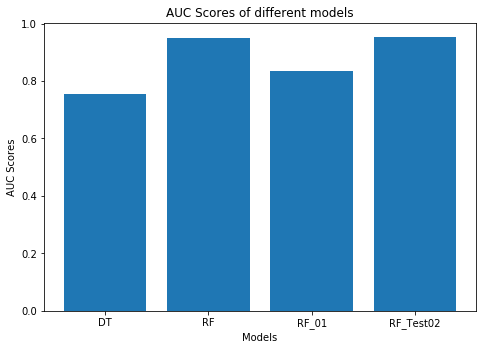

In [127]:
bar_chart(models, auc_scores, "AUC Scores of different models", "Models", 'AUC Scores')